<a href="https://colab.research.google.com/github/p4treina/First_Colab/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Distortion Classification Example**

In [33]:
path = '/content/drive/MyDrive/USP/Tesis/POC_Flask'
!cp -r '{path}' .

In [1]:
import os
import cv2
from tensorflow.keras.models import load_model
from POC_Flask.src.tools import Tools

In [2]:
# Dir Path
dir_path = os.path.dirname(os.path.abspath('POC_Flask/models'))

In [3]:
# Load models
model_128 = load_model(os.path.join(dir_path,'models/model_128'))
model_256 = load_model(os.path.join(dir_path,'models/model_256'))

In [29]:
# Load Image
file_path = os.path.join(dir_path, 'examples/Face_Julio_Live (2).jpg')
img = cv2.imread(file_path)

In [30]:
# Instatiate tools class
tools = Tools()
ready, size = tools.image_preprocess(img)
if size == 256:
    results = tools.get_results(model_256, ready)
elif size == 128:
    results = tools.get_results(model_128, ready)
else:
    msg = '[ERROR] Image size unsupported'
    print(msg)

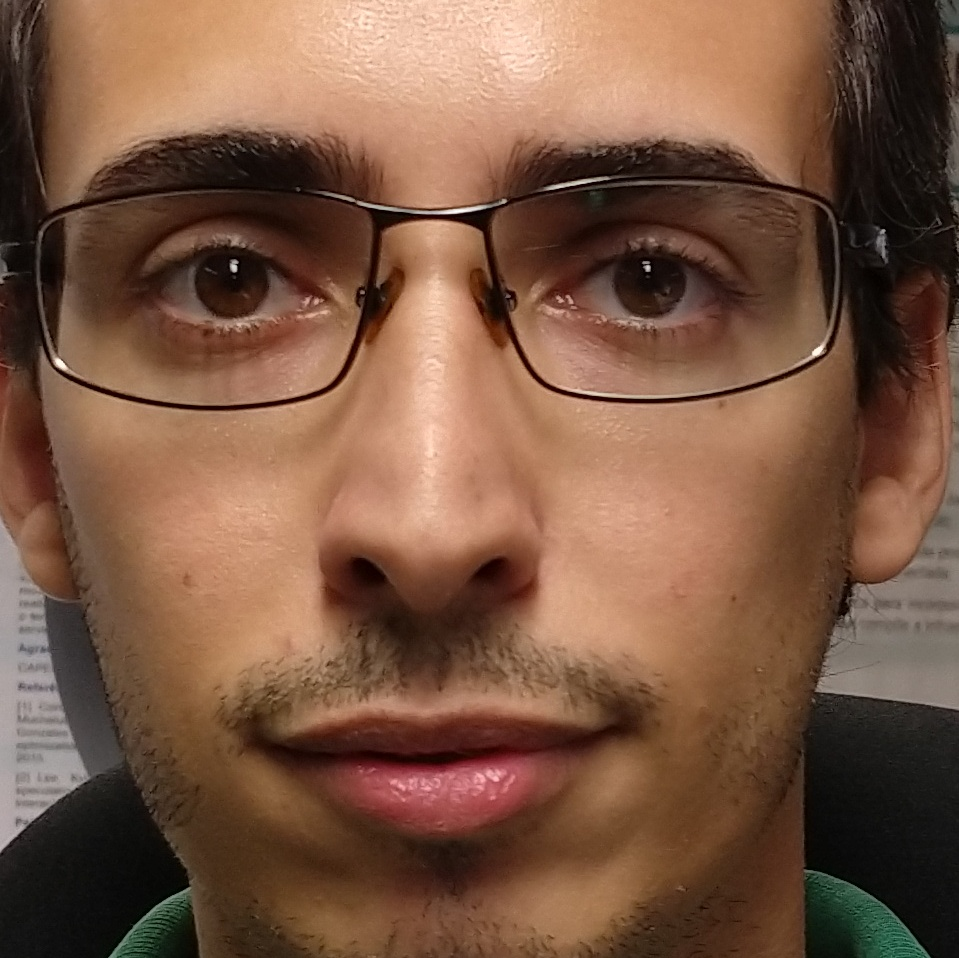

In [31]:
from IPython.display import Image
Image(file_path)

In [32]:
# Display results
try:
  for cont, dic in enumerate(results):
    if cont != 0:
      print('\n')
    for key, info in dic.items():
      print(str(key) + ':' + ' ' + str(info))
except Exception as e:
  print('Error while classifying the image: ', e)


Main Label: Clean
Probability: 0.41327637
Info: Image without distortions


Secundary Label: Low Brightness Level 1
Probability: 0.38758105
Info: Image with brightness factor = [0.8, 0.5]


Secundary Label: Gaussian Blur Level 1
Probability: 0.11612116
Info: Image with blur resembling a Gaussian distribution with std = [0.05, 2.5]
